In [ ]:
# Veri analizi ve görselleştirme için kütüphaneler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Makine öğrenmesi işlemleri için
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modeller
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:

df = pd.read_csv("kişilik.csv")


print(df.head())

# Veri tiplerini eksik değer var mı kontrol et
print(df.info())
print(df.isnull().sum())


   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data co

<ipython-input-3-4c125ad75fe9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Personality", palette="Set2")


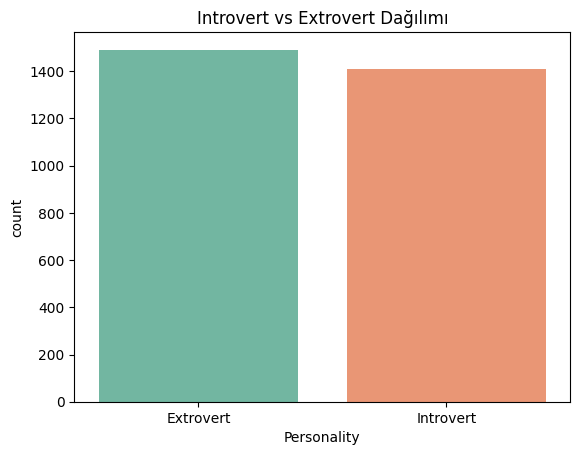

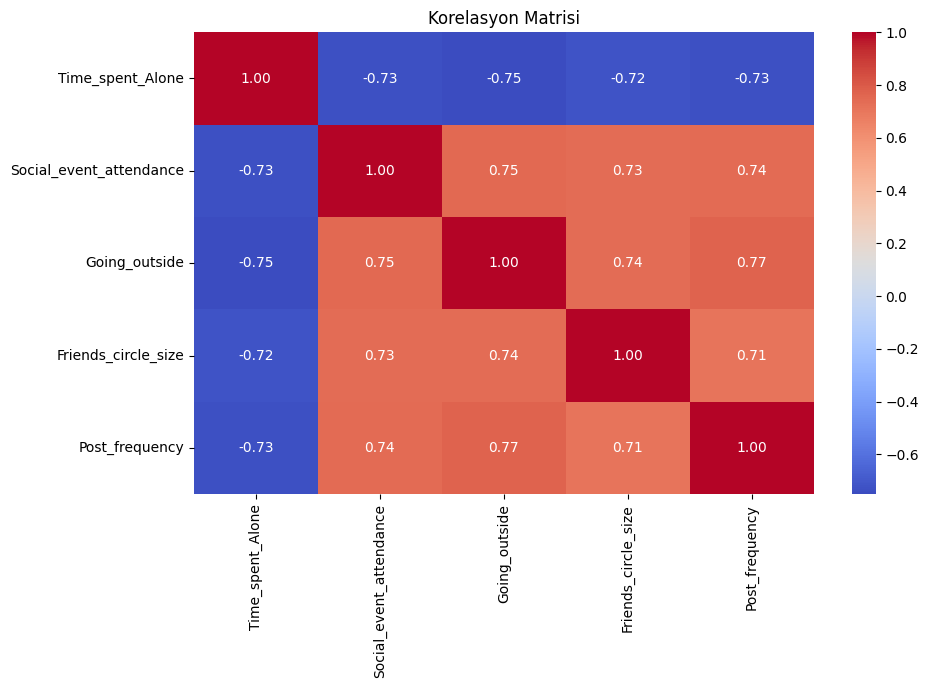

In [ ]:
# Kişilik dağılımı grafiği
sns.countplot(data=df, x="Personality", palette="Set2")
plt.title("Introvert vs Extrovert Dağılımı")
plt.show()

# Korelasyon matrisi (sayısal sütunlar arasında ilişki)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()


In [ ]:
# x: Giriş verileri , y: Hedef değişken
X = df.drop("Personality", axis=1)
y = df["Personality"]

# kategorik sütunları seçtim
categorical_columns = X.select_dtypes(include="object").columns
print("Kategorik sütunlar:", list(categorical_columns))


X[categorical_columns] = X[categorical_columns].apply(lambda col: col.map({'Yes': 1, 'No': 0}))

# eksik değerleri =0
X.fillna(0, inplace=True)

# hedef değişkeni sayıya çevirdim (Introvert = 0, Extrovert = 1 gibi)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Özellikleri standartlaştırdım (ortalama = 0, std = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Kategorik sütunlar: ['Stage_fear', 'Drained_after_socializing']


In [ ]:
# %80 eğitim  %20 test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)


🔹 Random Forest
Doğruluk: 0.9155
              precision    recall  f1-score   support

   Extrovert       0.93      0.91      0.92       302
   Introvert       0.90      0.92      0.91       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


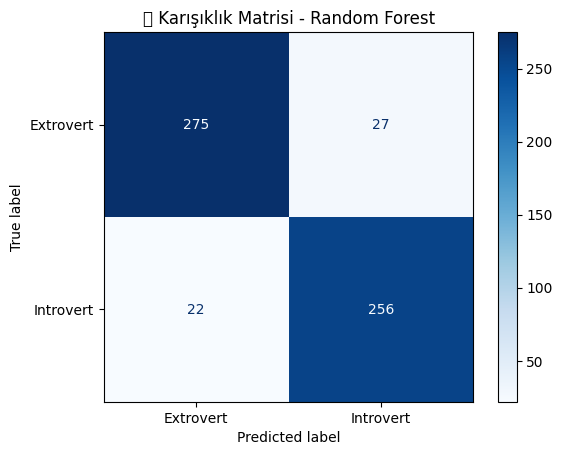

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


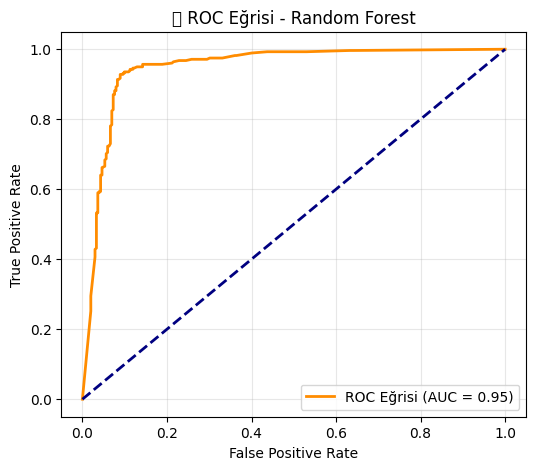

In [ ]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
# blanced veri dengesizliği için kullandım
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("Random Forest")
print(f"Doğruluk: {rf_acc:.4f}")

print(classification_report(y_test, y_pred_rf, target_names=le.classes_))
ConfusionMatrixDisplay.from_estimator(
    rf_model, X_test, y_test, display_labels=le.classes_, cmap='Blues'
)
plt.title(" Karışıklık Matrisi - Random Forest")
plt.show()
# ROC Eğrisi (Binary sınıflandırma için geçerli!)

y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f"ROC Eğrisi (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi - Random Forest")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


🔹 Logistic Regression
Doğruluk: 0.9224
              precision    recall  f1-score   support

   Extrovert       0.93      0.92      0.93       302
   Introvert       0.91      0.92      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


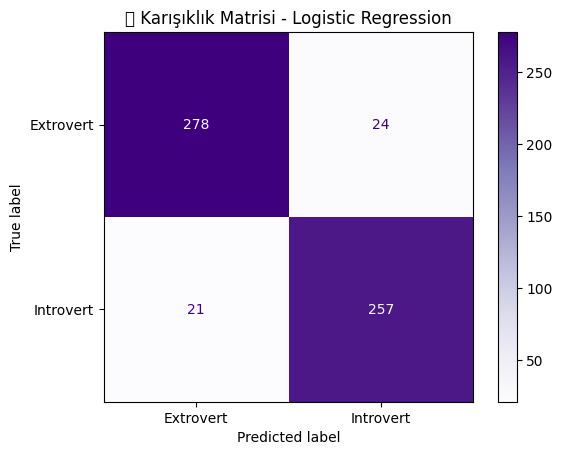

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


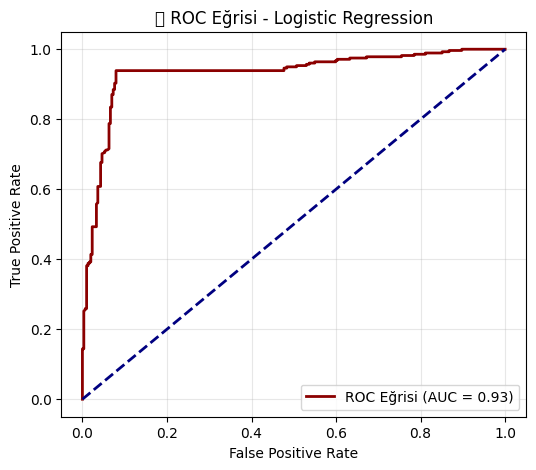

In [ ]:
log_model = LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)

print("Logistic Regression")
print(f"Doğruluk: {log_acc:.4f}")
print(classification_report(y_test, y_pred_log, target_names=le.classes_))

# Karışıklık Matrisi
ConfusionMatrixDisplay.from_estimator(
    log_model,
    X_test,
    y_test,
    display_labels=le.classes_,
    cmap='Purples'
)
plt.title(" Karışıklık Matrisi - Logistic Regression")
plt.show()

# ROC Eğrisi (Sadece ikili sınıflandırma için geçerlidir!)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob_log)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkred', lw=2,
         label=f"ROC Eğrisi (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" ROC Eğrisi - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

🔹 Support Vector Machine
Doğruluk: 0.9293
              precision    recall  f1-score   support

   Extrovert       0.94      0.92      0.93       302
   Introvert       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


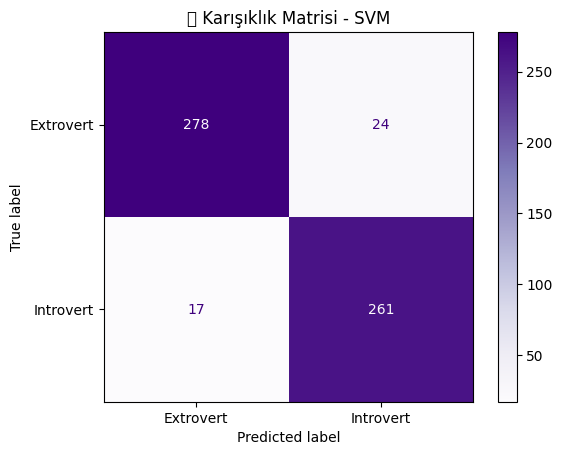

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


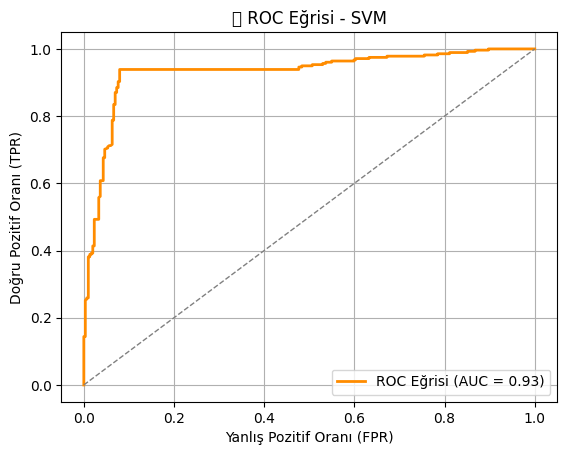

In [ ]:
# Destek Vektör Makineleri (SVM)
svm_model = SVC(class_weight='balanced')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)

print(" Support Vector Machine")
print(f"oğruluk: {svm_acc:.4f}")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))


# Karışıklık Matrisi (Confusion Matrix)
ConfusionMatrixDisplay.from_estimator(
    svm_model, X_test, y_test, display_labels=le.classes_, cmap='Purples'
)
plt.title(" Karışıklık Matrisi - SVM")
plt.show()

# ✅ 3. ROC Eğrisi
# Gerçek etiketler zaten 0 ve 1 (Introvert / Extrovert)
# Modelden olasılık tahmini al (Extrovert sınıfının olasılığı)
# ROC eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Eğrisi (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel("Yanlış Pozitif Oranı (FPR)")
plt.ylabel("Doğru Pozitif Oranı (TPR)")
plt.title("📈 ROC Eğrisi - SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



<ipython-input-22-7e7cc428b631>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


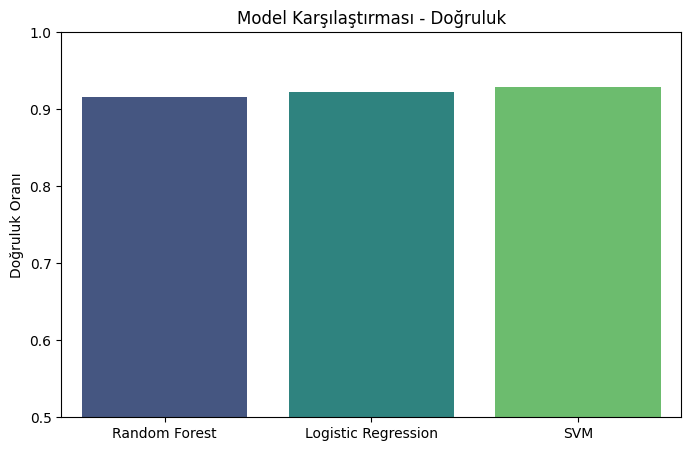

In [ ]:
# Modellerin doğruluklarını karşılaştıralım
model_names = ["Random Forest", "Logistic Regression", "SVM"]
accuracies = [rf_acc, log_acc, svm_acc,]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.ylim(0.5, 1.0)
plt.title("Model Karşılaştırması - Doğruluk")
plt.ylabel("Doğruluk Oranı")
plt.show()


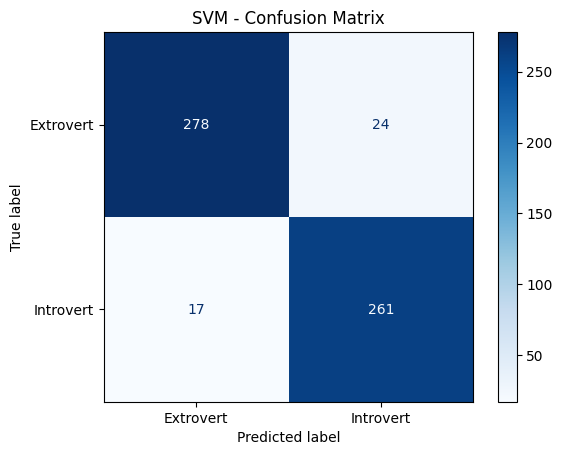

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels=le.classes_, cmap="Blues")
plt.title("SVM - Confusion Matrix")
plt.show()


In [ ]:
import joblib

joblib.dump(svm_model, "svm_kisilik_modeli.pkl")  # modeli kaydet


['svm_kisilik_modeli.pkl']

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix değerlerini al
cm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm.ravel()

# Toplam doğru ve yanlış
dogru = tn + tp
yanlis = fp + fn
toplam = dogru + yanlis

# Doğruluk ve hata oranı
accuracy = dogru / toplam
error_rate = yanlis / toplam

# Raporu yazdır
print("🔷 SVM Modeli Raporu\n")
print("Confusion Matrix:")
print(cm)
print(f"\n✔️ Doğru Tahmin Sayısı: {dogru}")
print(f"❌ Yanlış Tahmin Sayısı: {yanlis}")
print(f"🎯 Toplam Veri Sayısı: {toplam}")
print(f"\n✅ Doğruluk Oranı: {accuracy:.4f} ({accuracy*100:.1f}%)")
print(f"⚠️ Hata Oranı: {error_rate:.4f} ({error_rate*100:.1f}%)")

# Ek açıklama
print("\n📌 SVM modeli, kişilik sınıflandırmasında yüksek başarı göstermiştir.")
print("Extrovert ve Introvert sınıflarını %90'ın üzerinde doğrulukla tahmin etmektedir.")


🔷 SVM Modeli Raporu

Confusion Matrix:
[[278  24]
 [ 17 261]]

✔️ Doğru Tahmin Sayısı: 539
❌ Yanlış Tahmin Sayısı: 41
🎯 Toplam Veri Sayısı: 580

✅ Doğruluk Oranı: 0.9293 (92.9%)
⚠️ Hata Oranı: 0.0707 (7.1%)

📌 SVM modeli, kişilik sınıflandırmasında yüksek başarı göstermiştir.
Extrovert ve Introvert sınıflarını %90'ın üzerinde doğrulukla tahmin etmektedir.
